## Decorrelation demo

Lets have $X_1$ and $X_2$ that are correlated. 

A transformation is required to decorrelate $X_1$ and $X_2$.

$$
\begin{align*}
    Y_1 &= aX_1+bX_2 \\
    Y_2 &= cX_1+dX_2 \\    
    \end{align*}
$$

Pearson r coefficient: 0.9384762821798522


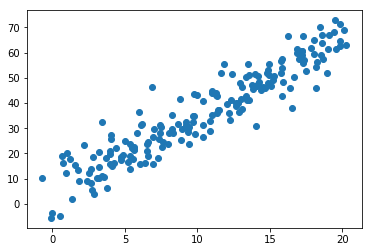

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.stats import norm, pearsonr 

x = np.arange(1,20,0.1)
# add noise
x = [i+norm.rvs() for i in x]
y = [3*i+5+norm.rvs(scale=6) for i in x]

plt.scatter(x,y);

print(f"Pearson r coefficient: {pearsonr(x,y)[0]}")

Compute the covariance between $X_1$ and $X_2$.

Find eigenvalues and eigenvectors of the $2\times 2$ covariance matrix.

$\Lambda, V = eig(cov)$

In [70]:
# To decorrelate 
data = np.array([x,y])

data.shape
# Calculate covariance matrix
cov = np.cov(data)
print(f"Covariance matrix: {cov}")

# Calculate Eigenvalues and Eigenvectors
w, v = linalg.eig(cov)

Covariance matrix: [[ 31.686055    94.29147461]
 [ 94.29147461 318.58848963]]


$X_1$ and $X_2$ can be decorrelated by multiplying $X_1$ and $X_2$ with the transpose of eigenvectors.

$Y = V^TX$

Resulting $Y_1$ and $Y_2$ will be uncorrelated (ie. covariance matrix will be diagonal). However variance of $Y_1$ and $Y_2$ will not be 1.

Covariance matrix: [[ 3.47151005e+00 -2.04516004e-14]
 [-2.04516004e-14  3.46803035e+02]]


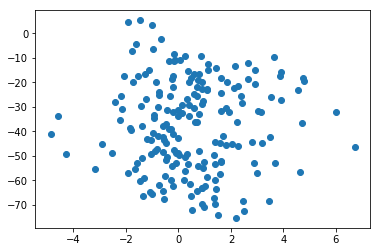

In [71]:
# Rotate data
rot_data = np.dot(v.T, data)

plt.scatter(rot_data[0,:],rot_data[1,:]);

# now the covariance matrix should be diagonal
cov = np.cov(rot_data)
print(f"Covariance matrix: {cov}")


$X_1$ and $X_2$ can be whitened by multiplying $X_1$ and $X_2$ with the $diag\{1/\sqrt{\lambda}\}$ and transpose of eigenvectors.

$Y = \lambda^{-0.5}V^TX$

Resulting $Y_1$ and $Y_2$ will be uncorrelated and have unit variane (ie. covariance matrix will be I). 

Covariance matrix: [[ 1.00000000e+00 -6.57909941e-16]
 [-6.57909941e-16  1.00000000e+00]]


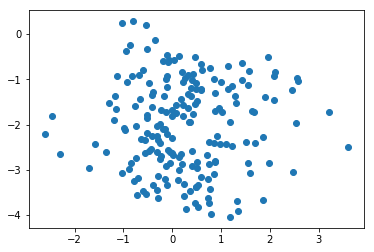

In [72]:
# Whiten data
diagw = np.diag(1/(w.real**0.5))
mat = np.dot(diagw, v.T)
new_data = np.dot(mat, data)

# Now the covariance matrix should be I
cov = np.cov(new_data)
print(f"Covariance matrix: {cov}")

plt.scatter(new_data[0,:], new_data[1,:]);